In [155]:
import numpy as np
import matplotlib.pyplot as  plt
from tqdm import tqdm

from np_fun import prob, prob_part
#from tf_fun import init as tf_init
from Annealing import Annealer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
tst = lambda z,x: np.sin(z[0]*x+z[1])+z[0]+np.cos(2*z[1])+z[0]*z[1]
carr =lambda f,z: lambda x: f(z,x)
sampl = lambda f,fm=0,to=10,cnt=100: [np.linspace(fm,to,cnt),list(map(f,np.linspace(fm,to,cnt)))]

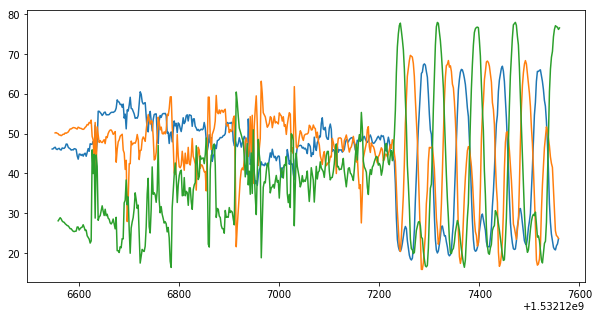

In [157]:
from numpy import genfromtxt
best_filenames=[
    './20_07/data_21-07-2018_01-59_port0.csv',
    './20_07/data_21-07-2018_01-59_port1.csv',
    './20_07/data_21-07-2018_01-59_port2.csv',
]
filenames = [
    './data_05-07-2018_20-20_port0.csv',
    './data_05-07-2018_20-30_port1.csv',
    './data_05-07-2018_20-20_port2.csv'
]
filenames = best_filenames
exp_points = [genfromtxt(i, delimiter=',') for i in filenames]
#times = [np.array(exp_points[i].T[1]) for i in range(len(filenames))]
times = [np.array(i.T[1]) for i in exp_points]
exp_points = [np.array(i.T[0]) for i in exp_points]
#exp_points = np.array([ ea[:502] for ea in exp_points])
# plot the data
plt.figure(figsize=(10,5))
for i,t in zip(exp_points,times):
    plt.plot(t,i)


### period is approx 120 sec, ampl 110-40=70, mean min is 43

(3, 140) (3, 140)
0.014227234882774553
Data points used: 3


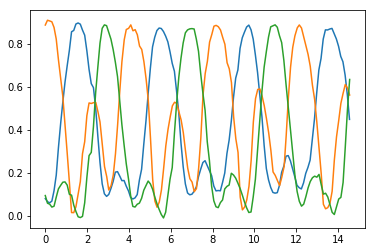

In [158]:
scaling_channels = [0.98,1.0,1.14]
exp_points = [exp_points[i]/scaling_channels[i] for i in range(len(exp_points))]
me_min, ampl, per = 15, 80-20, 80
start_exp, end_exp = -150, -10

data = np.array([ ep[start_exp:end_exp] for ep in exp_points])
pts = np.array([ t[start_exp:end_exp]-t[start_exp] for t in times])
print(data.shape,pts.shape)


data = data - me_min
data /= ampl
pts = pts/120*2*np.pi
for i,t in zip(data,pts):
    plt.plot(t,i)
l = len(pts)
pts
print(max(pts[1]-pts[2]))
pts = pts[0]
print('Data points used:',l)

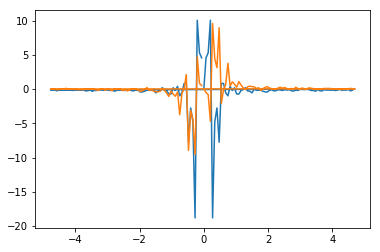

In [159]:
ft = np.fft.fft(data[0]-np.mean(data[0]))
freq = np.fft.fftfreq(ft.shape[-1],d=pts[1])
plt.plot(freq,ft.real)
plt.plot(freq,ft.imag)

80 11.668611435239207


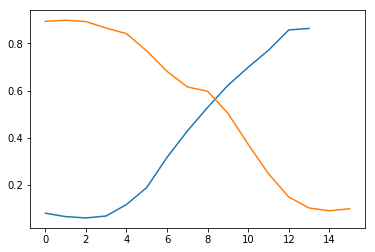

In [160]:
#### per = 1/0.15006
units_period = 1/0.0857
print(per,units_period)
plt.plot(data[0][:14])
plt.plot(data[0][14:30])


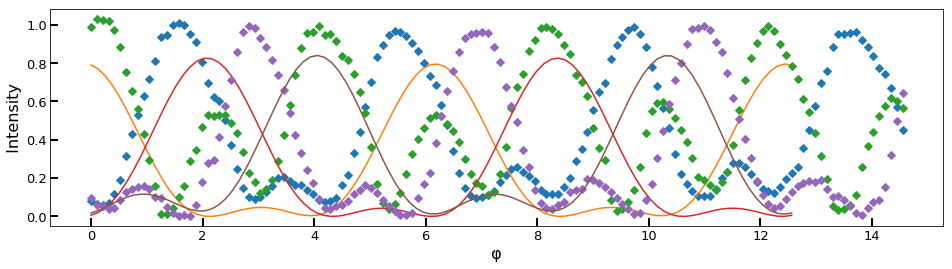

In [162]:
def func(x):
    return np.abs(np.square(prob_part(0,0,0,0,phi=x)))
def set_fonts_ticks(fig,ax):
    fontsize =16
    try:
        ax.set(xlabel=' φ ')
        ax.set(ylabel=' Intensity ')
    except:
        plt.ylabel(' Intensity ', fontsize=fontsize)
        plt.xlabel(' φ ',fontsize=fontsize)
    
    ax.tick_params(axis="y",direction="in",labelsize=13,width=2,length=8)
    ax.tick_params(axis="x",direction="in",labelsize=13,width=2,length=8)
def plot3(func,points_data=(pts,data),on_same=False):
    pts,data = points_data
    lin,d = sampl(func,0,12.56,100)
    d = np.array(d).T
    %matplotlib inline
    fs=(16,4)
    if on_same:
        plt.figure(figsize=fs)
        ax =[plt,plt,plt]
        f = plt
    else:
        f,ax = plt.subplots(1,3,figsize=fs,sharey=True)
    for i in range(3):
        ax[i].plot(pts,data[i],'D',label='data |%i>'%i)
        ax[i].plot(lin,d[i],label='func |%i>'%i)
        set_fonts_ticks(f,ax[i])
        #ax[i].legend()
    #plt.legend()
        
data_orig = data
transform_fun = lambda x: 1*np.sqrt(np.square(x)*(1+0.5*np.power(x,6)))
data = list(map(transform_fun,data_orig))
plot3(func,on_same=True)

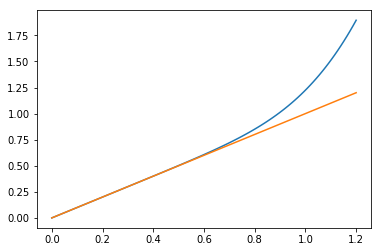

In [163]:
x = np.linspace(0,1.2,100)
y = transform_fun(x)
plt.plot(x,y)
plt.plot(x,x)

In [164]:
fixed = [0,0]
tst = lambda z,x: np.sin(z[0]*x+z[1])+z[0]+np.cos(2*z[1])+z[0]*z[1]
carr =lambda f,z: lambda x: f(z,x)
sampl_map_depr = lambda f,fm=0,to=10,cnt=100: [np.linspace(fm,to,cnt),list(map(f,np.linspace(fm,to,cnt)))]
sampl = lambda f,fm=0,to=10,cnt=100: [np.linspace(fm,to,cnt),f(np.linspace(fm,to,cnt))]
np_map = lambda f,x: np.array(list(map(f, x)))

device = lambda z,x:np.abs(np.square(prob_part(z[0],z[1],fixed[0],fixed[1],phi=x)))
unit = lambda z,x: device(z,x).dot(np.array([0,1,0]).T)
cost = lambda f,data,points=pts: np.sum(np.square(f(points).T-data))
foo = lambda x: unit([0,0],x)

ttt = carr(unit,[0,0])
cost(carr(device,[0,0]),data,pts)


104.2036926371731

In [129]:
def get_parametric(func,dots=50):
    xrange = np.linspace(-7.0, 7.0, dots)
    yrange = np.linspace(-7.0, 7.0, dots)
    p = np.zeros((len(xrange),len(yrange)))
    f2d = lambda x,y:cost(carr(func,[x,y]),data)
    #f2d = lambda x,y:opt.prob(x,y,12)
    for x in tqdm(range(len(xrange))):
        for y in range(len(yrange)):
            p[y,x] =  f2d(xrange[x],yrange[y])
    return xrange,yrange,p

def display_parametric(p):
    best_pos=np.unravel_index( np.argmin(p),p.shape)
    best_pos = [xrange[best_pos[0]], yrange[best_pos[1]]]
    print("Min cost is:",np.min(p),' at position ',best_pos)
    
    %matplotlib notebook
    plt.contourf(xrange,yrange,p,100)
    #plt.savefig('fig.png',dpi=300)
xrange,yrange,p = get_parametric(device)
print()

100%|██████████| 50/50 [00:04<00:00, 12.15it/s]

In [130]:
best_pos=np.unravel_index( np.argmin(p),p.shape)
best_pos = [xrange[best_pos[1]], yrange[best_pos[0]]]
print("Min cost is:",np.min(p),' at position ',best_pos)

Min cost is: 74.94456047081363  at position  [-0.14285714285714324, -3.0]


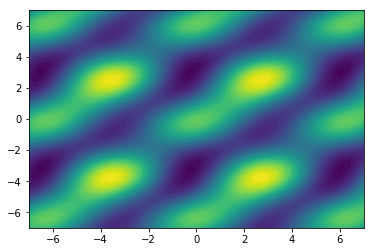

In [131]:

%matplotlib inline
plt.contourf(xrange,yrange,p,50)

#plt.scatter(*np.array(opt.dots).T,c=np.arange(len(opt.dots)),marker='o',alpha=0.7)
#plt.savefig('fig.png',dpi=300)

cost is  74.94456047081363


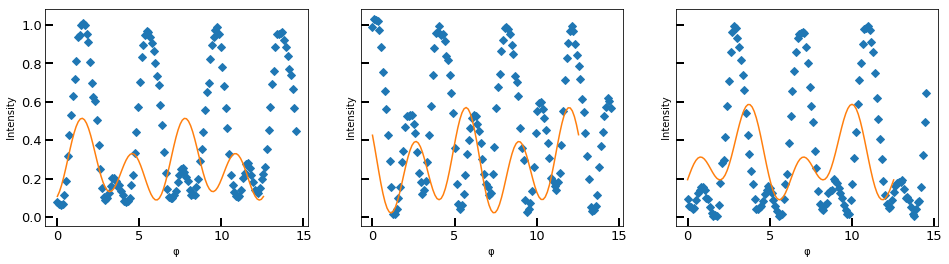

In [132]:

point = [-0.5,2.52]
point = best_pos
fun = carr(device,point)
print('cost is ',cost(fun,data))
plot3(fun)
#plt.figure(figsize=(15,5))
#plt.plot(pts,data[1],'D')
#plt.plot(*sampl(carr(unit,point),0,14))

cost 104.2036926371731


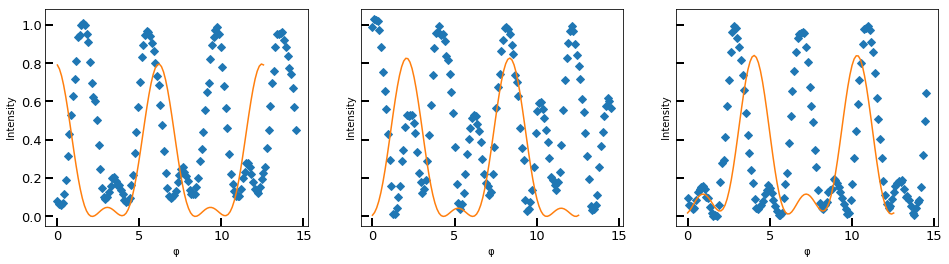

In [133]:
kek = carr(device,[0,0])
carr_dev = lambda x,y:carr(device,[x,y])
print("cost",cost(carr_dev(0,0),data))
plot3(kek)

plt.savefig('./figs/unfitted_cost19.5.eps')

In [120]:

func = lambda x: np.array([0.1,0,0.5]*len(x)).reshape(len(x),3)

print(func(np.array([2,3])))
print("cost",cost(func,data))
t_data = data[:,:]
#t_data[2,:]-=0.5
print("sumsq:",np.sum(np.square(data)))
plot3(func)


[[0.1 0.  0.5]
 [0.1 0.  0.5]]
cost 96.81490991497938


TypeError: list indices must be integers or slices, not tuple

### Optimisation


In [121]:
unit_all = lambda z,x: np.dot([0,1,0],np.abs(np.square(prob_part(z[0],z[1],z[2],z[3]+z[8]*x, phi=z[4]*x+z[5]))).T)*z[6]+z[7]
unit_all_sh = lambda z,x: np.abs(np.square(prob_part(z[0],z[1],z[2],z[3]+z[8]*x, phi=z[4]*x+z[5]))).T*z[6]+z[7]
unit_all = lambda z,x: np.abs(np.square(prob_part(z[0],z[1],z[2],z[3], phi=z[4]*x+z[5]))).T*z[6]+z[7]
def unit_all_ext(z,x):
    scale = np.array([z[6],z[8],z[10]]).reshape(-1,1)
    bias= np.array([z[7],z[9],z[11]]).reshape(-1,1)
    sq = np.abs(np.square(prob_part(z[0],z[1],z[2],z[3], phi=z[4]*x+z[5]))).T
    return np.multiply(sq,scale)+bias
    

In [122]:


opt = Annealer(unit_all_ext,points_data=(pts,data),energy=0.01)
#opt = Annealer(unit_all_sh,points_data=(pts,data),energy=3)
start = [ 1.97826339, 0.61469571, -2.23318571, -2.48897276,-1.56313198,-0.26907035,1.55959301, 0.06752256]
start_1d = [ -4.47259827, -16.59763161,  -0.10024442,  -4.70741011, -1.5601084, 8.85820219,   1.26772687,  -0.01726806]


In [ ]:
start = [0,0,0,0,-1,0]
#start = [0,0,0,0,-1,0,1,0]
#start = [1.97641972,  0.46830365, -2.34256105, -2.7767623,  1.53977032, -0.45830121]
#start+= [1.5291502, -0.04907852]*3
start+= [1., 0]*3
#start = [1.97641972,  0.46830365, -2.34256105, -2.7767623,  -1.53977032, -0.45830121, 1.48391502, -0.04907852]
#start = [-25.648831,   -16.91017209, -10.20137638 , 11.01714674, 1.12643974, -6.81656814,3.31360078,-0.39924749]
#----
#start = [ 1.97826339, 0.61469571, -2.23318571, -2.48897276,-1.56313198,-0.26907035,1.55959301, 0.06752256]
#start = [ 1.967253,0.48585659,-2.33491508,-2.78094184,-1.54426616,-0.48716136, 1.48614562,-0.04299893]
#start = [ 1.96138566 ,0.50875255,-2.35032956,-2.76200031,-1.54908902,-0.49052423,1.48531792,-0.03484366]
#start = [ 1.9275381  ,0.59061329,-2.34954988,-2.7051162,-1.55274685,-0.45482005,1.48985282,-0.01583345]
#start = [ 1.92458872e+00 ,6.32120251e-01,-2.37815466e+00,-2.69702060e+00,-1.55968124e+00,-4.25383658e-01, 1.49321705e+00,5.56355378e-04]
#start = [ 1.92847165, 0.6375538, -2.36868504,-2.68888271,-1.55939054,-0.42065203]#,1.49548067, 0.00481282]
#-----
#start = [ 2.12656275, 0.47688792,-1.98577565,-2.35514891,-1.55995708,-0.23963736,1.44947365,-0.01452177]
#-----
start = [1.95919984e+00, 8.19740538e-01,-2.26230497e+00,-2.72042327e+00,-1.55939054e+00,-4.20652030e-01 ,1.53312784e+00 ,1.68078388e-03,1.44252585e+00 ,9.75280255e-02 ,1.48103378e+00,-2.73642836e-02]
start = [1.95919984e+00, 8.19740538e-01,-2.26230497e+00,-2.72042327e+00,-1.55939054e+00,2.5,1.53312784e+00 ,1.68078388e-03,1.44252585e+00 ,9.75280255e-02 ,1.48103378e+00,-2.73642836e-02]
start = [0,0,0,0,-1.55939054e+00,2.5,1.53312784e+00 ,1.68078388e-03,1.44252585e+00 ,9.75280255e-02 ,1.48103378e+00,-2.73642836e-02]
#start+= [1.5291502, -0.04907852]*3

start = opt.best
#start[8]*=0.96
#start[9]-=0.1

start[0]*=0.9
start[1]*=0.9
start[2]*=0.9
start[3]*=0.8
#start[9]+=0.05
#start = point
#start_1d = [ -4.47259827, -16.59763161,  -0.10024442,  -4.70741011 , -1.5601084, 8.85820219,   1.26772687,  -0.01726806]
#start = [ 1.65353401, -0.47372438, -3.24028015, -2.16909992, -1.57036921,  0.08920259, 1.69030152, -0.148071]
scales= np.array([0.5]*4+[1,1]+[0.1,0.1]*3)*0.005
#scales= np.array([0,0,0,0,0,0]+[0.2,0.3]*3)*0.05
point,cost = opt.opt(start_point=start,
                     energy=0.01,
                     scales = scales,
                     max_steps =2000
                    )

print(point,cost)
print(opt.best)

 48%|████▊     | 950/2000 [00:03<00:03, 271.93it/s]

1.8338439487344016


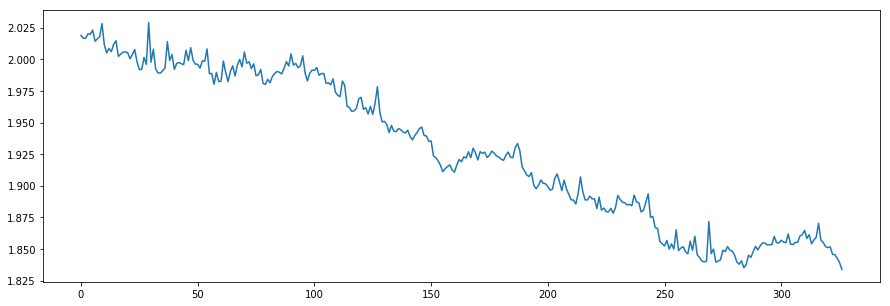

In [423]:
plt.figure(figsize=(15,5))
plt.plot(opt.costs)
print(np.min(opt.costs))

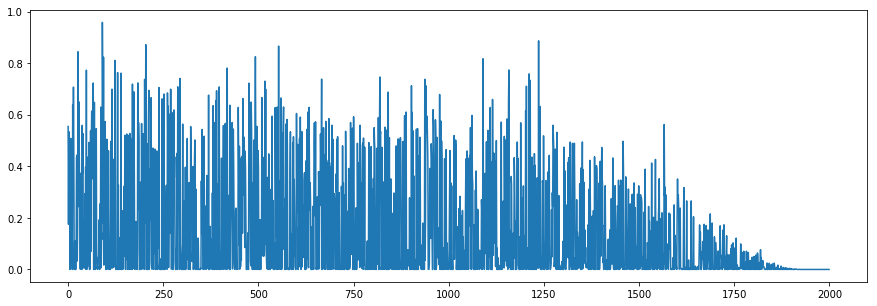

In [424]:

plt.figure(figsize=(15,5))
plt.plot(opt.probs)

best cost: 1.8319141546840862


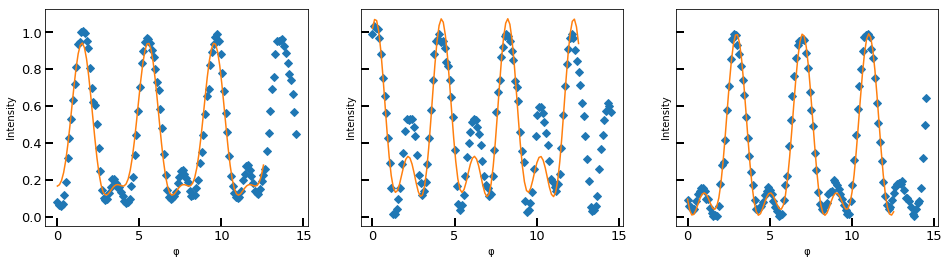

In [425]:
%matplotlib inline
#opt.best+=np.array([0]*8+[0.05,-0.05,0,0])

best_fun= carr(opt.func,opt.best)
print('best cost:',opt.cost(best_fun))
#plot3(lambda x: best_fun(x).T,on_same=True)
plot3(lambda x: best_fun(x).T,points_data=(opt.points,opt.data))
#plt.savefiIg('figs/fitted_cost1.7oooo.eps')


In [412]:
%matplotlib inline
unit_all_1 = lambda z,x: np.abs(np.square(prob_part(z[0],z[1],z[2],z[3], phi=z[4]*x+z[5]))).T*z[6]+z[7]
print(opt.best)
def unit_ideal(z,x):
    scale = np.array([z[6],z[8],z[10]]).reshape(-1,1)
    bias= np.array([z[7],z[9],z[11]]).reshape(-1,1)
    sq = np.abs(np.square(prob_part(z[0],z[1],z[2],z[3], phi=z[4]*x+2.5))).T
    return np.multiply(sq,scale)+bias
 
best_fun= carr(unit_ideal,[0,0,0,0]+opt.best[4:])
print(opt.cost(best_fun))
plot3(lambda x: best_fun(x).T,points_data=(opt.points,data))

[-0.52059253  0.18963339 -0.44691516 -0.50753561 -1.55917653  2.35364309
  1.13529431  0.11590071  1.38374595  0.09913701  1.15714087  0.02163976]


ValueError: operands could not be broadcast together with shapes (4,) (8,) 

40.28952322087176


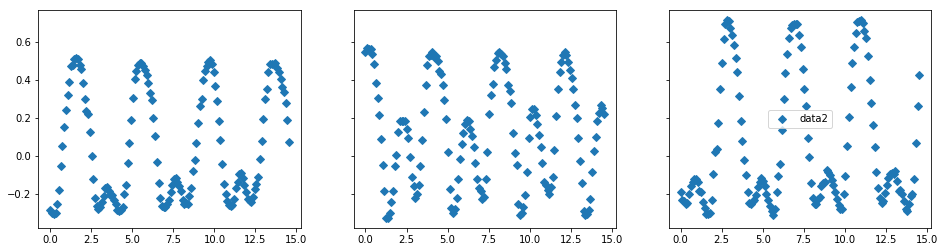

In [140]:
#lin,d = sampl(func,0,12.56,100)
#d = np.array(d).T
f = best_fun(pts)
%matplotlib inline
fs=(16,4)
print(np.sum(np.square(data - f)))
fig,ax = plt.subplots(1,3,figsize=fs,sharey=True)
for i in range(3):
    ax[i].plot(pts, data[i]-f[i],'D',label='data%i'%i)
plt.legend()
best_point = opt.best

In [116]:
print(best_point)


[-1.14090937 -4.868435    3.29710431  3.69819689 -1.54512081  3.94440442
  1.15132815 -0.04640095]
